<a href="https://colab.research.google.com/github/Bharath772/Project1/blob/main/100threads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Understanding the Data**


The data set consists of 2 files:

train.csv: This file will be used to build the model
test.csv: This file will be used to predict the purchase
The data set consists of following Columns:

• User_ID : User id of the customer

• Product_ID: Product id of the product

• Gender: male or female

• Age: Age in bins i.e 0-17, 18-25, 26-35, 36-45, 46-50, 51-55, 55+

• Occupation: Occupation (Masked)

• City_Category: Category of the City (A,B,C)

• Stay_In_Current_City_Years: Number of years stay in current city

• Marital_Status: 0-Unmarried, 1-Married

• Product_Category_1: Product Category (Masked)

• Product_Category_2: Product may belongs to other category also (Masked)

• Product_Category_3: Product may belongs to other category also (Masked)

Analysis step
Trying to identify the most important variables and defining the best regression model for predicting target variable. Hence, this analysis will be divided into five stages:

**1.Exploratory data analysis (EDA)**

**2.Data Pre-processing**

**3.Feature engineering**

**4.Modeling**

**5.Prediction and Metrics**

**6.Improving the Model (Hyperparameter tuning)**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/Sales Data/train.csv')
test=pd.read_csv('/content/drive/MyDrive/Sales Data/test.csv')
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [ ]:
train.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [ ]:
train.isna().mean()*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [ ]:
# droping Product_Category_3 column
train.drop(["Product_Category_3"],  axis=1, inplace=True)

In [ ]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,7969


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

Text(0.5, 1.0, 'Purchase amount Distribution')

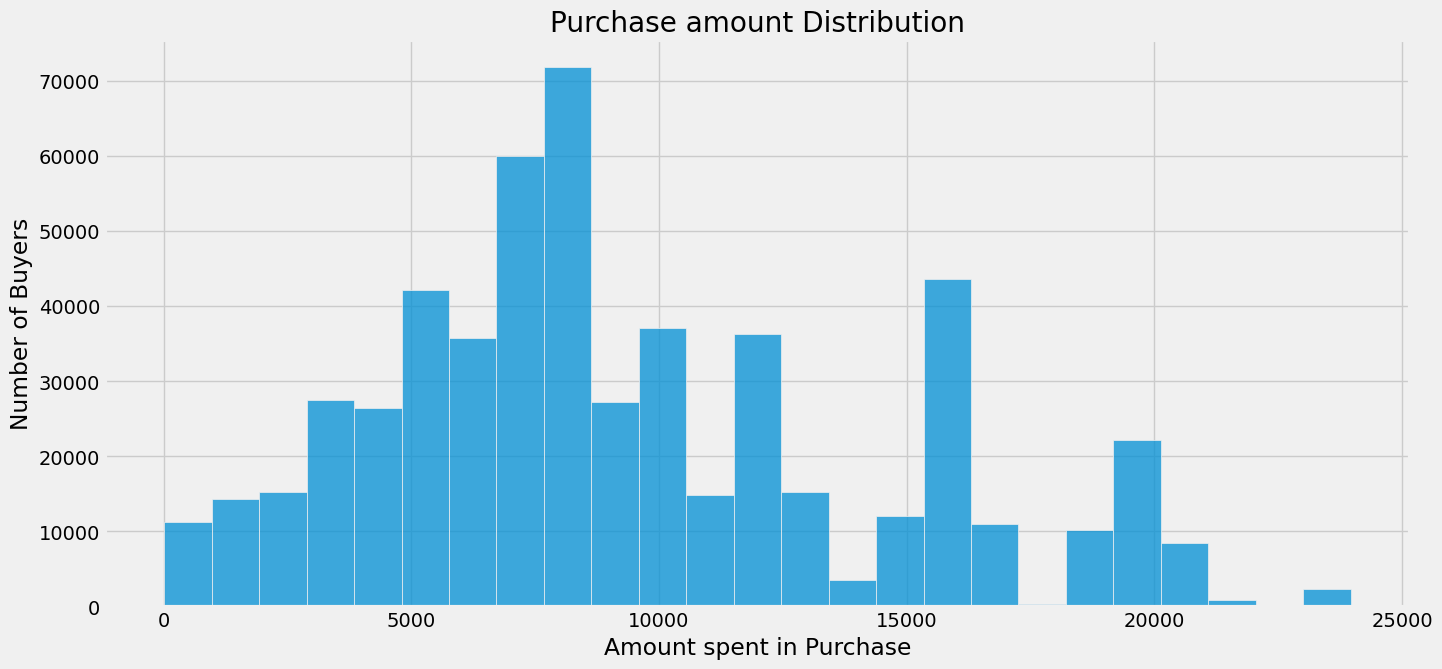

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,7))
sns.histplot(train.Purchase, bins = 25)
plt.xlabel("Amount spent in Purchase")
plt.ylabel("Number of Buyers")
plt.title("Purchase amount Distribution")

In [ ]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

User_ID                 int64
Occupation              int64
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Purchase                int64
dtype: object

<Axes: xlabel='Marital_Status', ylabel='count'>

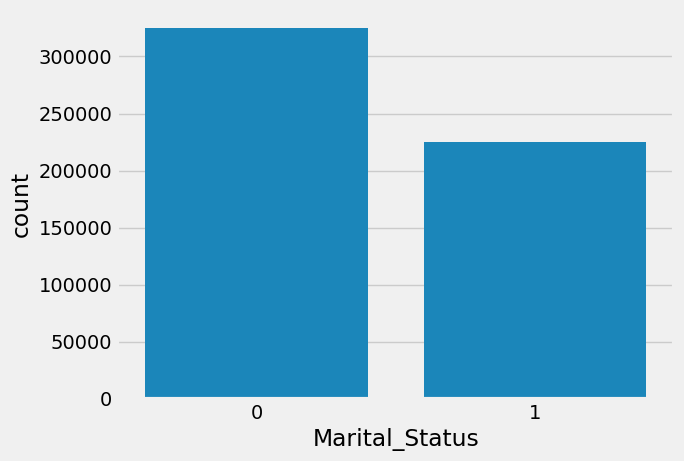

In [ ]:
sns.countplot(x="Marital_Status",data=train)

<Axes: xlabel='Product_Category_1', ylabel='count'>

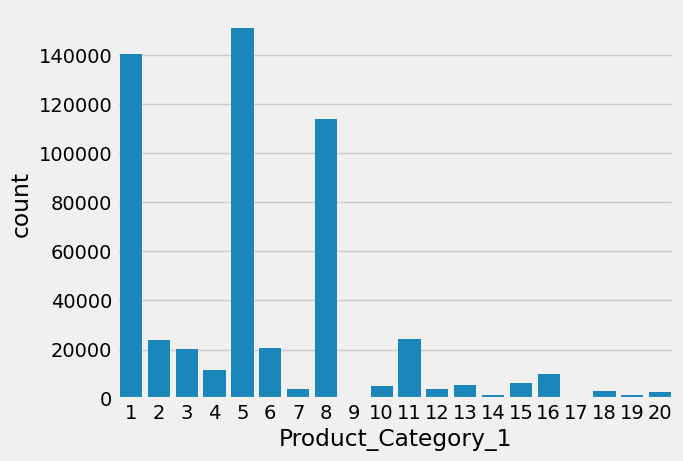

In [ ]:
sns.countplot(x="Product_Category_1",data=train)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, '2.0'),
  Text(1, 0, '3.0'),
  Text(2, 0, '4.0'),
  Text(3, 0, '5.0'),
  Text(4, 0, '6.0'),
  Text(5, 0, '7.0'),
  Text(6, 0, '8.0'),
  Text(7, 0, '9.0'),
  Text(8, 0, '10.0'),
  Text(9, 0, '11.0'),
  Text(10, 0, '12.0'),
  Text(11, 0, '13.0'),
  Text(12, 0, '14.0'),
  Text(13, 0, '15.0'),
  Text(14, 0, '16.0'),
  Text(15, 0, '17.0'),
  Text(16, 0, '18.0')])

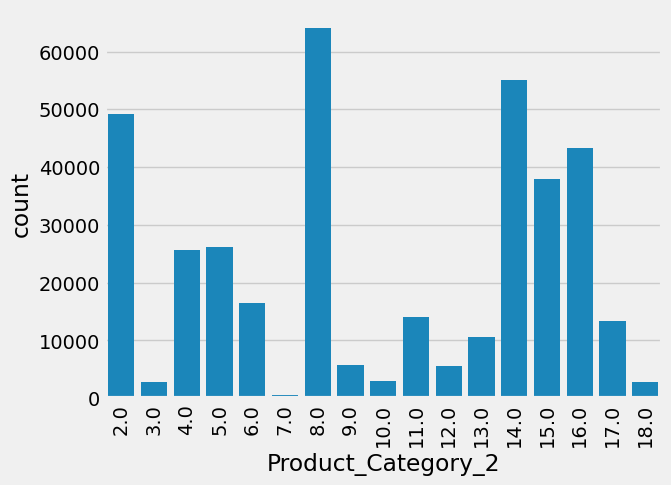

In [ ]:
sns.countplot(x="Product_Category_2",data=train)
plt.xticks(rotation=90)

In [ ]:
corr = numeric_features.corr()

<Axes: >

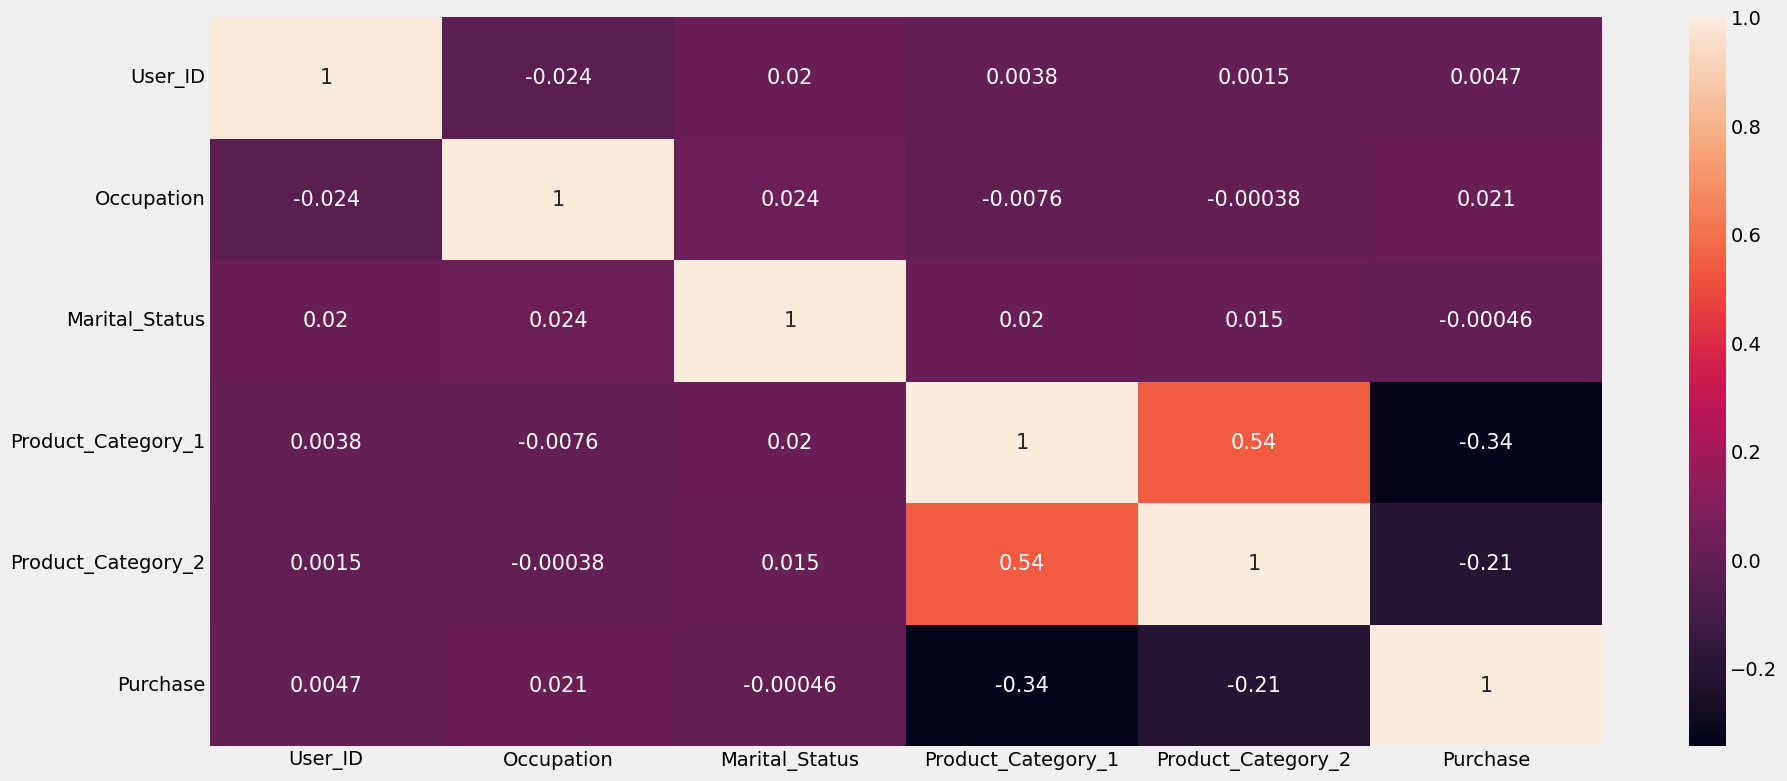

In [ ]:
#correlation matrix
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr,  annot=True,annot_kws={'size': 15})

<Axes: xlabel='Gender', ylabel='count'>

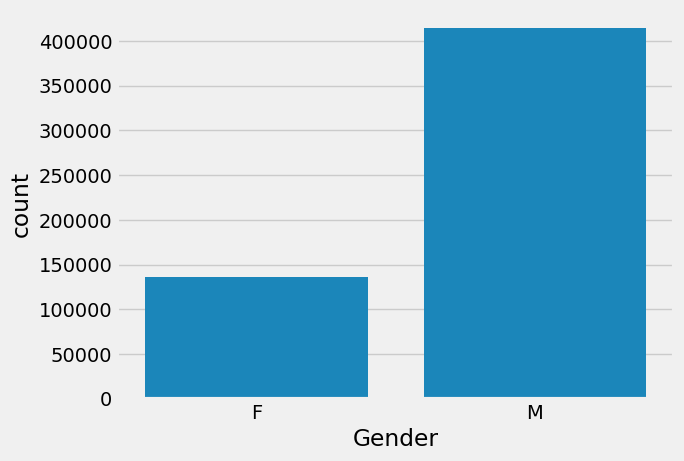

In [ ]:
sns.countplot(x="Gender",data=train)

<Axes: xlabel='Age', ylabel='count'>

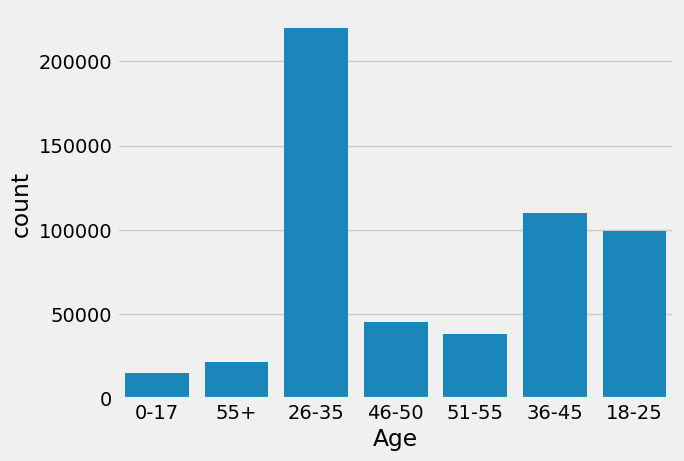

In [ ]:
sns.countplot(x="Age",data=train)

<Axes: xlabel='City_Category', ylabel='count'>

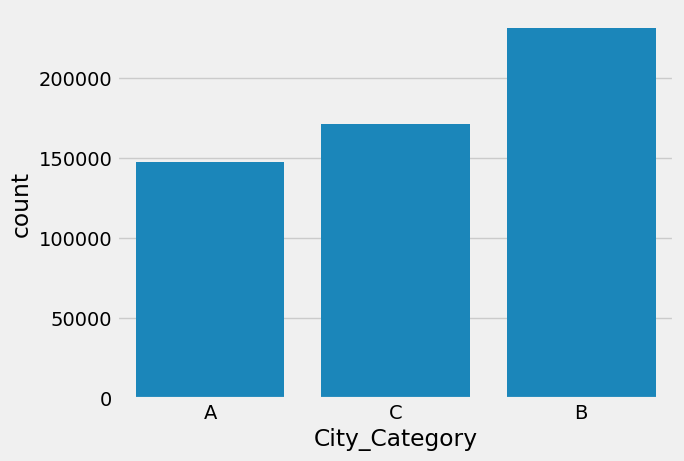

In [ ]:
sns.countplot(x="City_Category",data=train)

In [ ]:
marital_status_pivot= train.pivot_table(index='Marital_Status',values='Purchase', aggfunc=np.mean)
marital_status_pivot

,Purchase
Marital_Status,
0,9265.907619
1,9261.174574


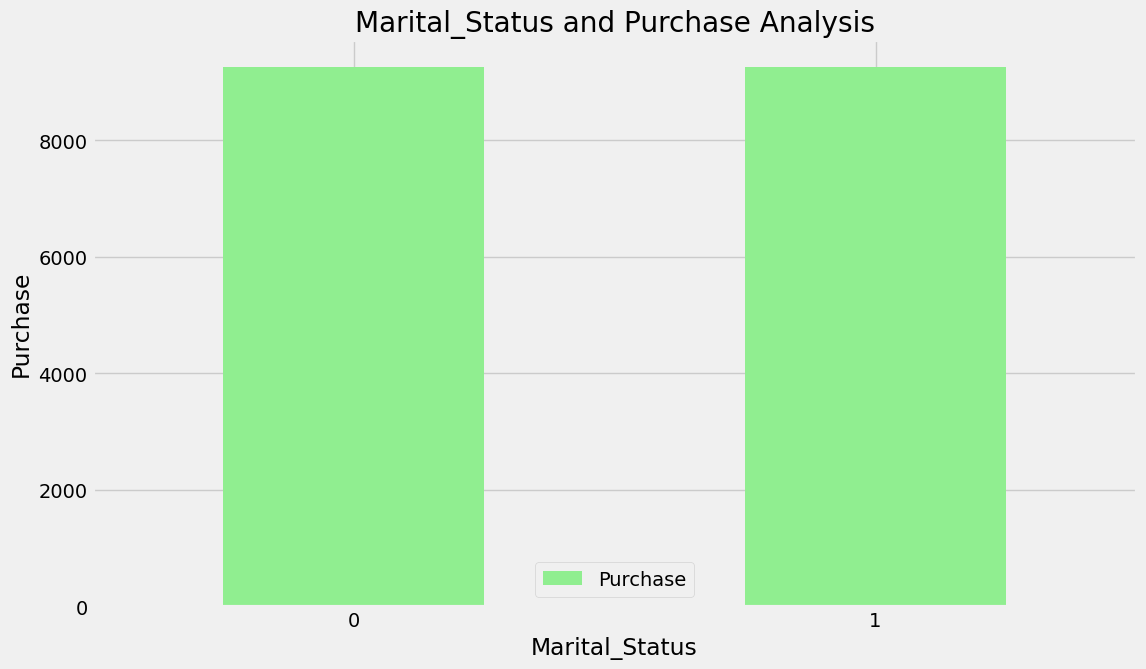

In [ ]:
marital_status_pivot.plot(kind='bar', color='lightgreen',figsize=(12,7))
plt.xlabel("Marital_Status")
plt.ylabel("Purchase")
plt.title("Marital_Status and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

In [ ]:
Product_category_1_pivot = train.pivot_table(index='Product_Category_1', values="Purchase", aggfunc=np.mean)
Product_category_1_pivot

,Purchase
Product_Category_1,
1,13606.218596
2,11251.935384
3,10096.705734
4,2329.659491
5,6240.088178
6,15838.478550
7,16365.689600
8,7498.958078
9,15537.375610


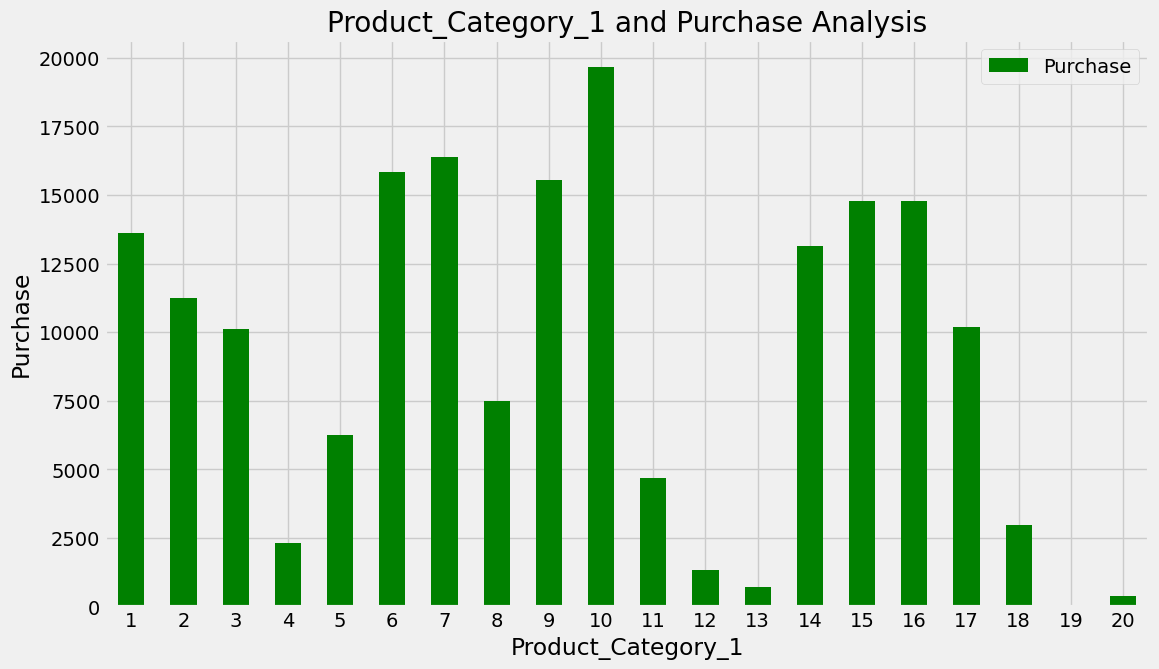

In [ ]:
Product_category_1_pivot.plot(kind='bar', color='green',figsize=(12,7))
plt.xlabel("Product_Category_1")
plt.ylabel("Purchase")
plt.title("Product_Category_1 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

In [ ]:
Product_category_2_pivot = train.pivot_table(index='Product_Category_2', values="Purchase", aggfunc=np.mean)
Product_category_2_pivot

,Purchase
Product_Category_2,
2.0,13619.356401
3.0,11235.359570
4.0,10215.192001
5.0,9027.821574
6.0,11503.551379
7.0,6884.683706
8.0,10273.259518
9.0,7277.006851
10.0,15648.729543


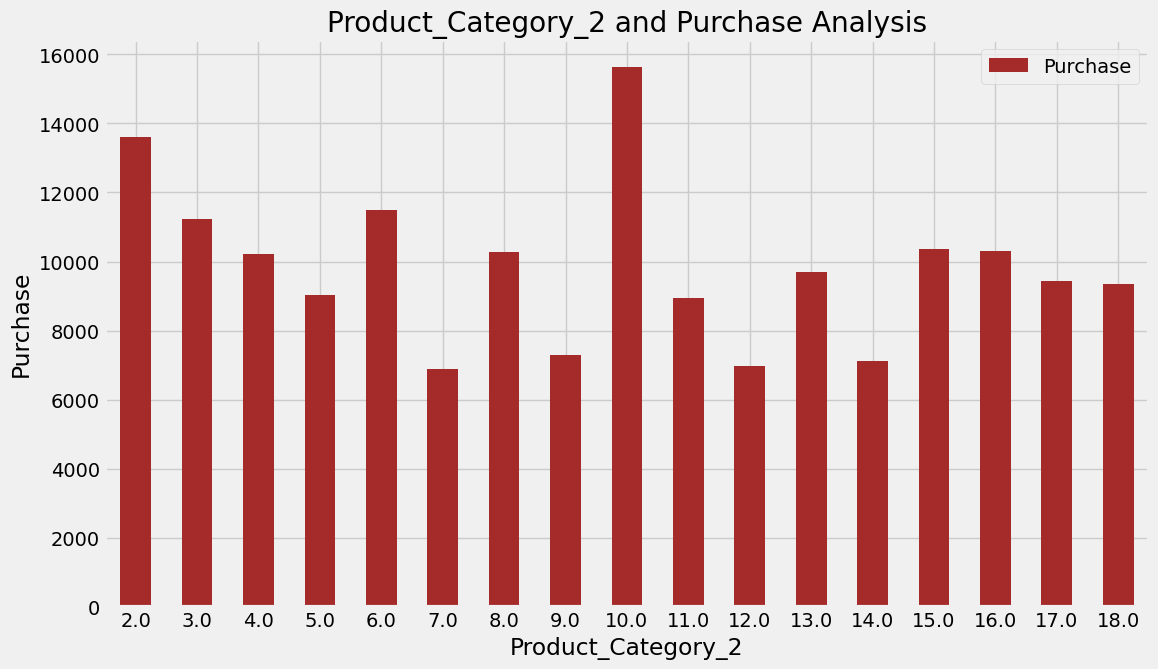

In [ ]:
Product_category_2_pivot.plot(kind='bar', color='brown',figsize=(12,7))
plt.xlabel("Product_Category_2")
plt.ylabel("Purchase")
plt.title("Product_Category_2 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

In [ ]:
gender_pivot = train.pivot_table(index='Gender', values="Purchase", aggfunc=np.mean)
gender_pivot

,Purchase
Gender,
F,8734.565765
M,9437.526040


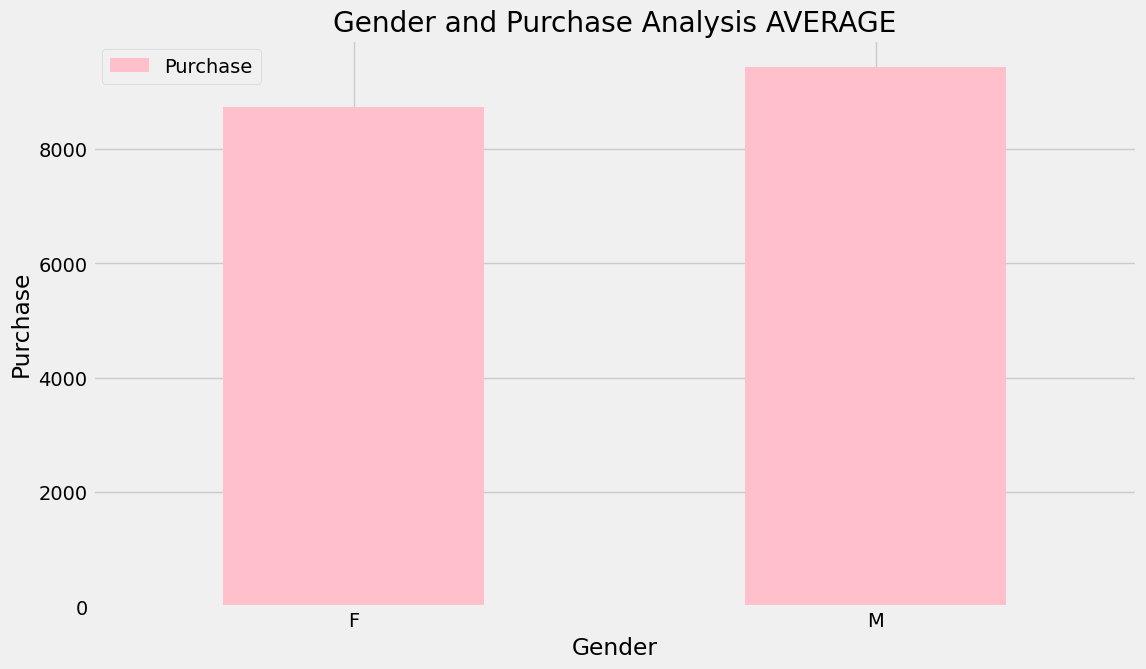

In [ ]:
gender_pivot.plot(kind='bar', color='pink',figsize=(12,7))
plt.xlabel("Gender")
plt.ylabel("Purchase")
plt.title("Gender and Purchase Analysis " "AVERAGE")
plt.xticks(rotation=0)
plt.show()

In [ ]:
age_pivot = train.pivot_table(index='Age', values="Purchase", aggfunc=np.sum)
age_pivot

,Purchase
Age,
0-17,134913183
18-25,913848675
26-35,2031770578
36-45,1026569884
46-50,420843403
51-55,367099644
55+,200767375


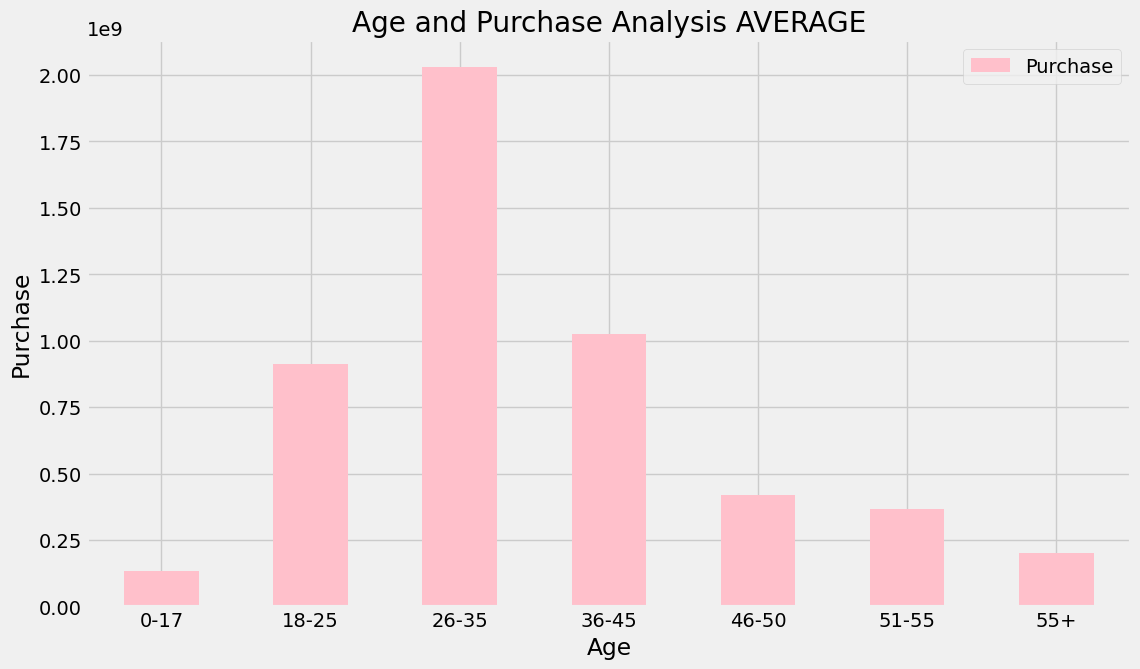

In [ ]:
age_pivot.plot(kind='bar', color='pink',figsize=(12,7))
plt.xlabel("Age")
plt.ylabel("Purchase")
plt.title("Age and Purchase Analysis " "AVERAGE")
plt.xticks(rotation=0)
plt.show()

In [ ]:
Stay_In_Current_City_Years_pivot = train.pivot_table(index='Stay_In_Current_City_Years', values="Purchase", aggfunc=np.mean)
Stay_In_Current_City_Years_pivot

,Purchase
Stay_In_Current_City_Years,
0,9180.075123
1,9250.145923
2,9320.429810
3,9286.904119
4+,9275.598872


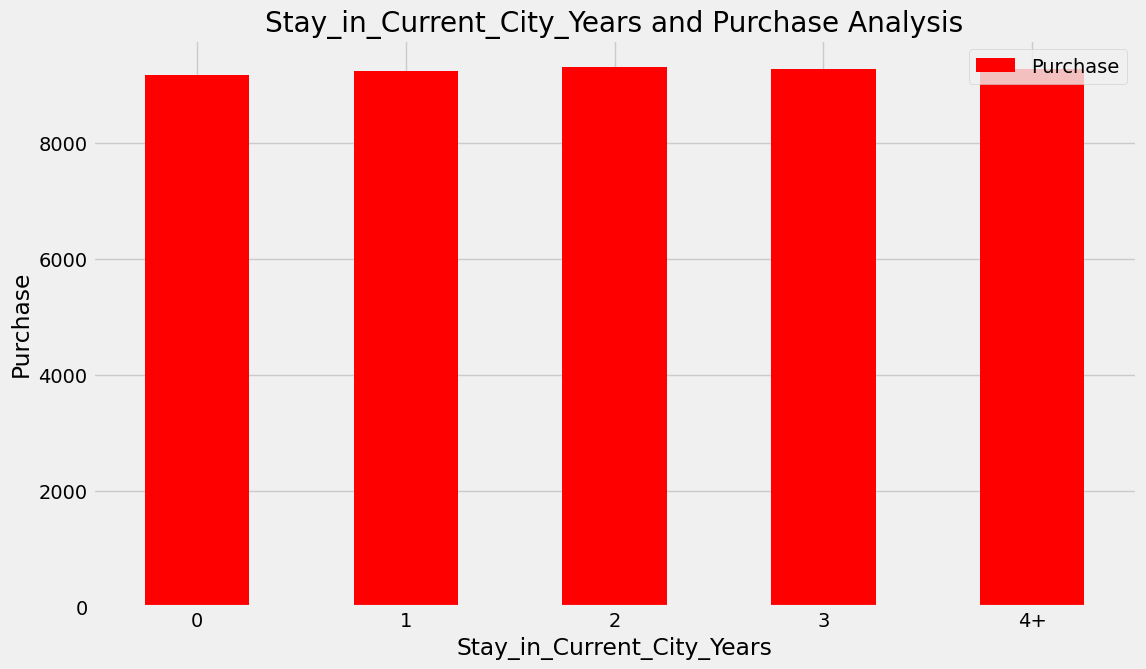

In [ ]:
Stay_In_Current_City_Years_pivot.plot(kind='bar', color='red',figsize=(12,7))
plt.xlabel("Stay_in_Current_City_Years")
plt.ylabel("Purchase")
plt.title("Stay_in_Current_City_Years and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

Again, we see the same pattern seen before which show that on average people tend to spend the same amount on purchases regardeless of their group. People who are new in city are responsible for the higher number of purchase, however looking at it individually they tend to spend the same amount independently of how many years the have lived in their current city.

**Data Pre-Processing**

In [ ]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


It is generally a good idea to combine both test and train sets into one, in order to perform data cleaning and feature engineering and later divide them again. With this step we do not have to go through the trouble of repeating twice the same code, for both datasets. Let’s combine them into a dataframe datawith a source column specifying where each observation belongs.

In [ ]:
# Join Train and Test Dataset
train['source']='train'
test['source']='test'

df = pd.concat([train,test], ignore_index = True, sort = False)

print(train.shape, test.shape, df.shape)

(550068, 12) (233599, 12) (783667, 13)


Since train set do not contain column product_category_3 , it has to be deleted from test as well as combined data frame

In [ ]:
test.drop(["Product_Category_3"],  axis=1, inplace=True)
df.drop(["Product_Category_3"],  axis=1, inplace=True)

In [ ]:
print(train.shape, test.shape, df.shape)

(550068, 12) (233599, 11) (783667, 12)


## **Dealing with Null-Values**

In [ ]:
#Check the percentage of null values per variable
df.isnull().mean()*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.388587
Purchase                      29.808452
source                         0.000000
dtype: float64

In [ ]:
# Replacing Null Values in Product_Category_2 with the median of the column
df["Product_Category_2"].fillna(train["Product_Category_2"].median(), inplace = True)

Removing Product_Category_1 group 19 and 20 from Train as this is not in Product_Category_2

In [ ]:
#Get index of all columns with product_category_1 equal 19 or 20 from train

ind = df.index[(df.Product_Category_1.isin([19,20])) & (df.source == "train")]
df = df.drop(ind)

In [ ]:
df.shape

(779514, 12)

**Dealing with Categorical Values**

In [ ]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                      float64
source                         object
dtype: object

## The categorical columns are Product_ID, Gender, Age, City_Category, Stay_In_Current_City_Years and Source

In [ ]:
#Filter categorical variables and get dataframe will all strings columns names except Item_identfier and outlet_identifier
category_cols = df.select_dtypes(include=['object']).columns.drop(["source"])
#Print frequency of categories
for col in category_cols:
    #Number of times each value appears in the column
    frequency = df[col].value_counts()
    print("\nThis is the frequency distribution for " + col + ":")
    print(frequency)


This is the frequency distribution for Product_ID:
Product_ID
P00265242    2709
P00025442    2310
P00110742    2292
P00112142    2279
P00046742    2084
             ... 
P00056342       1
P00241842       1
P00107942       1
P00206542       1
P00253842       1
Name: count, Length: 3672, dtype: int64

This is the frequency distribution for Gender:
Gender
M    587052
F    192462
Name: count, dtype: int64

This is the frequency distribution for Age:
Age
26-35    311554
36-45    155898
18-25    141209
46-50     64902
51-55     54450
55+       30316
0-17      21185
Name: count, dtype: int64

This is the frequency distribution for City_Category:
City_Category
B    328524
C    241487
A    209503
Name: count, dtype: int64

This is the frequency distribution for Stay_In_Current_City_Years:
Stay_In_Current_City_Years
1     274937
2     144599
3     134750
4+    120054
0     105174
Name: count, dtype: int64


# Feature Engineering

# Converting gender to binary

In [ ]:
gender_dict = {'F':0, 'M':1}
df["Gender"] = df["Gender"].apply(lambda x: gender_dict[x])

df["Gender"].value_counts()

Gender
1    587052
0    192462
Name: count, dtype: int64

# Converting Age to numeric values

In [ ]:
age_dict={'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}
df['Age']=df['Age'].apply(lambda x:age_dict[x])
df['Age'].value_counts()

Age
2    311554
3    155898
1    141209
4     64902
5     54450
6     30316
0     21185
Name: count, dtype: int64

# Converting city_category to Numeric

In [ ]:
city={'A':0,'B':1,'C':2}
df['City_Category']=df['City_Category'].apply(lambda x: city[x])
df['City_Category'].value_counts()

City_Category
1    328524
2    241487
0    209503
Name: count, dtype: int64

# Converting Stay_In_Current_City_Year to numeric

In [ ]:
def stay(Stay_In_Current_City_Years):
        if Stay_In_Current_City_Years == '4+':
            return 4
        else:
            return Stay_In_Current_City_Years
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].apply(stay).astype(int)

# Exporting Data

In [ ]:
#Divide into test and train:
train = df.loc[df['source']=="train"]
test = df.loc[df['source']=="test"]

#Drop unnecessary columns:
test.drop(['source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_clean.csv",index=False)
test.to_csv("test_clean.csv",index=False)

<ipython-input-48-6cd156ad5c4f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['source'],axis=1,inplace=True)
<ipython-input-48-6cd156ad5c4f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['source'],axis=1,inplace=True)


In [ ]:
train= pd.read_csv('/content/drive/MyDrive/Sales Data/train_clean.csv')
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,9.0,8370.0
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,15200.0
2,1000001,P00087842,0,0,10,0,2,0,12,9.0,1422.0
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,1057.0
4,1000002,P00285442,1,6,16,2,4,0,8,9.0,7969.0


In [ ]:
test= pd.read_csv('/content/drive/MyDrive/Sales Data/test_clean.csv')
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000004,P00128942,1,4,7,1,2,1,1,11.0,NaN
1,1000009,P00113442,1,2,17,2,0,0,3,5.0,NaN
2,1000010,P00288442,0,3,1,1,4,1,5,14.0,NaN
3,1000010,P00145342,0,3,1,1,4,1,4,9.0,NaN
4,1000011,P00053842,0,2,1,2,1,0,4,5.0,NaN


# Modelling

In [ ]:
X = train.drop(['Product_ID','User_ID','Purchase'], axis=1)
y = train["Purchase"]

In [ ]:
# splitting train and test set
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=42)

In order to identify the best model,we will compare the following ml algorithms:

Random Forest Regressor

Linear Regression

Decision Tree Regressor

# Random Forest Regressor Model

In [ ]:
#model
%time
rf_regressor = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

rf_regressor.fit(X_train, y_train)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10.3 µs


RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
#model
%time
lr_regressor=LinearRegression(normalize=True, n_jobs=-1)

lr_regressor.fit(X_train, y_train)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs


TypeError: LinearRegression.__init__() got an unexpected keyword argument 'normalize'

# Decision Tree Regressor

In [ ]:
# model
%time
DT_regressor = DecisionTreeRegressor()
DT_regressor.fit(X_train, y_train)

CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 10.5 µs


DecisionTreeRegressor()

# Prediction and Metrics

In [ ]:
def pred(mod,X_test,y_test):
  y_pred=mod.predict(X_test)
  R2 = r2_score(y_test, y_pred)
  RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
  return R2, RMSE

# Random Forest Regressor

In [ ]:
r2_score_rf, rmse_rf= pred(rf_regressor,X_test,y_test)

# Linear Regression

In [ ]:
r2_score_lr, rmse_lr= pred(lr_regressor,X_test,y_test)

NameError: name 'lr_regressor' is not defined

# Decision Tree Regressor

In [ ]:
r2_score_dt, rmse_dt= pred(DT_regressor,X_test,y_test)

In [ ]:
compare = {"R^2_score":[r2_score_rf,r2_score_dt],
            " Root Mean Squared Error": [rmse_rf, rmse_dt]}


Compare = pd.DataFrame(compare, index=[["Random Forest Regressor","Decision Tree Regressor"]])
Compare

,R^2_score,Root Mean Squared Error
Random Forest Regressor,0.630569,3027.104231
Decision Tree Regressor,0.598459,3155.915260


It seems that among all the two models, Random Forest Regressor has highest R^2_score and lowest Root Mean Squared Error.

Thus Random Forest Regressor is performs best.

**Improving Model**

In [ ]:
grid =  {"n_estimators": [10,50,100],
       "max_depth": [None,10,20,30,40,50,],
       "max_features": ["auto", "sqrt"],
       "min_samples_leaf": [2,10,15],
       "min_samples_split": [2,5,20]}

In [ ]:
randomsearchCV = RandomizedSearchCV(rf_regressor, param_distributions = grid, n_iter = 5, cv=5,  verbose = True, n_jobs=-1)

In [ ]:
randomsearchCV.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [ ]:
rf_regressor_tune = RandomForestRegressor(n_estimators=100, max_depth = 50, max_features = 'auto', min_samples_leaf =10,
                                     min_samples_split=2)

In [ ]:
rf_regressor_tune.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=50, max_features='auto', min_samples_leaf=10)

In [ ]:
r2_rf_tune, rmse_rf_tune=pred(rf_regressor_tune,X_test,y_test)

In [ ]:
compare1 = {"R^2_score":[r2_score_rf, r2_rf_tune],
            " Root Mean Squared Error": [rmse_rf,rmse_rf_tune]}


Compare1 = pd.DataFrame(compare1, index=[["Before_tune", "After_tune",]])
Compare1

,R^2_score,Root Mean Squared Error
Before_tune,0.630569,3027.104231
After_tune,0.652664,2935.183536


**Make predictions on test data with the model whose hyperparameters are tuned**

In [ ]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000004,P00128942,1,4,7,1,2,1,1,11.0,NaN
1,1000009,P00113442,1,2,17,2,0,0,3,5.0,NaN
2,1000010,P00288442,0,3,1,1,4,1,5,14.0,NaN
3,1000010,P00145342,0,3,1,1,4,1,4,9.0,NaN
4,1000011,P00053842,0,2,1,2,1,0,4,5.0,NaN


In [ ]:
predicted= test[['User_ID','Product_ID']]
test =test.drop(['User_ID','Product_ID','Purchase'],axis=1)

In [ ]:
test.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,1,4,7,1,2,1,1,11.0
1,1,2,17,2,0,0,3,5.0
2,0,3,1,1,4,1,5,14.0
3,0,3,1,1,4,1,4,9.0
4,0,2,1,2,1,0,4,5.0


In [ ]:
test_pred = rf_regressor_tune.predict(test)
test_pred

array([16344.52977165,  9912.42570264,  7482.25970643, ...,
       12658.77124512, 20863.58481   ,  2618.42169087])

In [ ]:
print(rf_regressor_tune.feature_importances_)

[0.00490011 0.01506041 0.02660203 0.00815656 0.01826861 0.00689241
 0.9025459  0.01757396]


In [ ]:
columns = pd.DataFrame({"Features": test.columns,
                        "Feature Importance" :rf_regressor_tune.feature_importances_})

In [ ]:
columns.sort_values("Feature Importance", ascending = False).reset_index(drop=True)

,Features,Feature Importance
0,Product_Category_1,0.902546
1,Occupation,0.026602
2,Stay_In_Current_City_Years,0.018269
3,Product_Category_2,0.017574
4,Age,0.015060
5,City_Category,0.008157
6,Marital_Status,0.006892
7,Gender,0.004900


<Axes: xlabel='Feature Importance', ylabel='Features'>

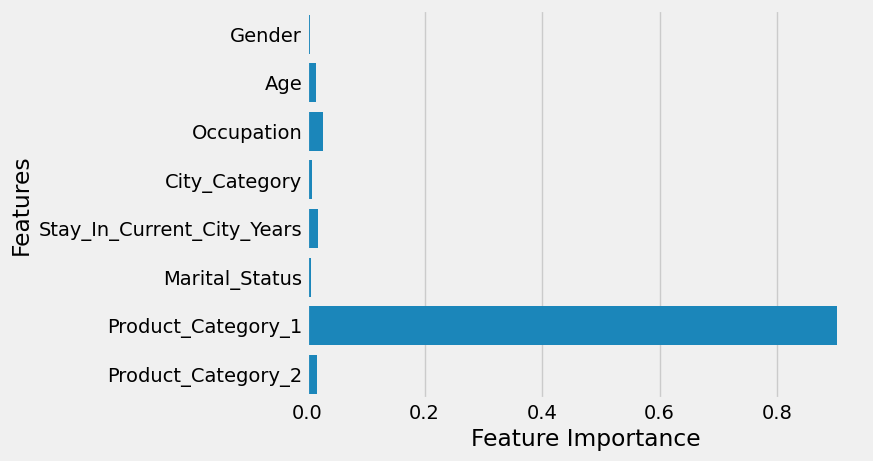

In [ ]:
sns.barplot(y="Features", x = "Feature Importance", data = columns)

In [ ]:
predicted['Predicted_Purchase']=test_pred

In [ ]:
predicted.head()

,User_ID,Product_ID,Predicted_Purchase
0,1000004,P00128942,16344.529772
1,1000009,P00113442,9912.425703
2,1000010,P00288442,7482.259706
3,1000010,P00145342,2260.702241
4,1000011,P00053842,2214.382933


In [ ]:
predicted.to_csv("predict.csv",index=False)

In [ ]:
import pickle
pickle_file = open('model.pkl', 'ab')
pickle.dump(rf_regressor_tune, pickle_file)
pickle_file.close()

In [ ]:
!pip install gradio==3.43.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.4 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size=5584 sha256=e7b1013feabe0581e032f1135cf496b966a9e25797e5c4de0aa9e2c6972a93df
 

In [ ]:
import gradio as gr
import pandas as pd
import pickle
from datetime import date,timedelta,datetime

In [1]:
import gradio as gr
import pandas as pd
from datetime import datetime
import pickle

def stay(Stay_In_Current_City_Years):
    if Stay_In_Current_City_Years == '4+':
        return 4
    else:
        return Stay_In_Current_City_Years

def fn(inputs):
    df=pd.read_csv(inputs.name)
    df=df.iloc[:10,:]
    df.drop(["Product_Category_3"],  axis=1, inplace=True)
    df["Product_Category_2"].fillna(df["Product_Category_2"].median(), inplace = True)
    gender_dict = {'F':0, 'M':1}
    df["Gender"] = df["Gender"].apply(lambda x: gender_dict[x])
    age_dict={'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}
    df['Age']=df['Age'].apply(lambda x:age_dict[x])
    city={'A':0,'B':1,'C':2}
    df['City_Category']=df['City_Category'].apply(lambda x: city[x])
    df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].apply(stay).astype(int)
    predicted= df[['User_ID','Product_ID']]
    df=df.drop(['User_ID','Product_ID'],axis=1)
    with open('model.pkl', 'rb') as pickle_file:
        model = pickle.load(pickle_file)
    test_pred = model.predict(df)
    predicted['Predicted_Purchase']=test_pred
    filename1 = datetime.now().strftime("%Y_%m_%d")
    predicted.to_csv(filename1+"_predict.csv",index=False)
    return predicted

file = gr.inputs.File(label=None)
output = gr.outputs.Dataframe(type="pandas")
gui = gr.Interface(fn=fn,
                   inputs=file,
                   outputs=output,
                   title="Future Sales Prediction Using \n Machine Learning",
                   article="")
gui.launch(share=True)



ModuleNotFoundError: No module named 'gradio'